### NLP-yelp project

https://www.yelp.com/dataset oku öğren

Project Circle
1. küçük harfe çevir
3. Noktalama işaretlerini kaldır
4. rakamları kaldır
5. satır sonlarını kaldır
6. kelimeleri ayır (tokenize)
7. Lemma ve Stemma
8. Vektörize et

tüphaneleri yükle

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('yelp.csv')

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
df.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\r\n\r...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [7]:
df['text'][9998]

'My nephew just moved to Scottsdale recently so me and a bunch of friends brought him here to show him a local bar that he and the girlfriend could come shoot pool, watch football, play volleyball etc...well....we weren\'t there 5minutes and 2 kids were running around the pool tables, messing up our games and screaming. I couldn\'t believe the staff was allowing this to happen. They were hitting the pool sticks on everything and crying when their mom attempted (in vain) to quiet them. You\'d think the mom would leave at this point with her  kids....um...no....the staff did seem annoyed as well but said nothing. Then....it happened...she said " you guys better behave or mommy will be fired"!! Holy shit....she works there!! Even worse! Shame on that owner for allowing this to happen. And that employee needs to recognize this...YOU WORK AT A BAR.....not a daycare....A BAR!!!'

In [11]:
df['text']= df['text'].str.lower()
df['text']

0       my wife took me here on my birthday for breakf...
1       i have no idea why some people give bad review...
2       love the gyro plate. rice is so good and i als...
3       rosie, dakota, and i love chaparral dog park!!...
4       general manager scott petello is a good egg!!!...
                              ...                        
9995    first visit...had lunch here today - used my g...
9996    should be called house of deliciousness!\r\n\r...
9997    i recently visited olive and ivy for business ...
9998    my nephew just moved to scottsdale recently so...
9999    4-5 locations.. all 4.5 star average.. i think...
Name: text, Length: 10000, dtype: object

In [20]:
df['text'] = df['text'].str.replace('[^\w\s]', '', regex=True) #noktalama iişaretleri temizle
df['text'][1:5]


1    i have no idea why some people give bad review...
2    love the gyro plate rice is so good and i also...
3    rosie dakota and i love chaparral dog park its...
4    general manager scott petello is a good egg no...
Name: text, dtype: object

In [22]:
df['text'] = df['text'].str.replace('\n|\t|\r|\d+', '', regex=True) # kaçış karakterleri ve rakamları kaldır
df['text']


0       my wife took me here on my birthday for breakf...
1       i have no idea why some people give bad review...
2       love the gyro plate rice is so good and i also...
3       rosie dakota and i love chaparral dog park its...
4       general manager scott petello is a good egg no...
                              ...                        
9995    first visithad lunch here today  used my group...
9996    should be called house of deliciousnessi could...
9997    i recently visited olive and ivy for business ...
9998    my nephew just moved to scottsdale recently so...
9999     locations all  star average i think arizona r...
Name: text, Length: 10000, dtype: object

<Axes: xlabel='stars', ylabel='count'>

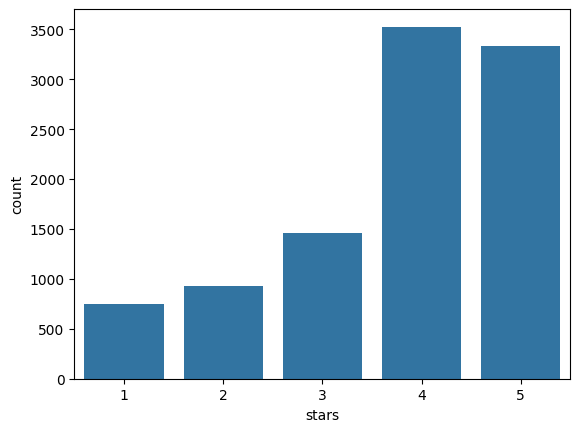

In [23]:
import seaborn as sns
sns.countplot(x=df['stars'])

In [27]:
yelpbw = df[(df['stars']==1)|(df['stars']==5)]
yelpbw.shape

(4086, 10)

In [28]:
yelpbw.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,my wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,i have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,rosie dakota and i love chaparral dog park its...,review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,general manager scott petello is a good egg no...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,drop what youre doing and drive here after i a...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [29]:
yelpbw.reset_index(drop=True, inplace=True)
yelpbw.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,my wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,i have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,rosie dakota and i love chaparral dog park its...,review,uZetl9T0NcROGOyFfughhg,1,2,0
3,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,general manager scott petello is a good egg no...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
4,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,drop what youre doing and drive here after i a...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [31]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [41]:
y = yelpbw['stars']
X = yelpbw['text']

In [42]:
vect= CountVectorizer()

In [43]:
X = vect.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [46]:
tf = pd.DataFrame(X_train.toarray(), columns=vect.get_feature_names_out())
tf.head()

,______i,aa,aaa,aaaamazingthey,aaammmazzingits,aaron,aathis,ab,aback,abandoned,...,zuchinni,zumba,zupa,zupas,zuzu,zuzus,zwiebelkräuter,éclairs,école,ém
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
tf.shape

(3268, 24718)

### modeli oluşturma

In [48]:
lr = LogisticRegression()

### modeli eğitme

In [50]:
lr.fit(X_train, y_train)

c:\Users\ahmi_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score

### tahmnleri yapma

In [53]:
pred = lr.predict(X_test, )

### model sonuçlarını değerlendirme

In [54]:
accuracy_score(y_test, pred)

0.9070904645476773

In [55]:
confusion_matrix(y_test, pred)

array([[103,  44],
       [ 32, 639]], dtype=int64)